# Optimizing-Agricultural-Production
## Problem Statement -
Building a Predictive Model so as to suggest the most suitable crops to grow based on the available climatic and soil conditions.

## Goal -
To achieve precision farming by optimizing the agricultural production.
The project is intended on Precision Farming.

➔ To Optimize Productivity

➔ By Understanding requirements of climatic and soil conditions for crops.

➔ Helps us to Cope up with weather unpredictability.

## About The Dataset Used (data.csv) -
The Dataset Consists of 22 Unique Crops such as Maize, Wheat, Mango, Watermelon, Mango etc.

➔ The dataset consists of climatic conditions required to grow the crops.

   ◆ Temperature, Humidity, Rainfall.

➔ The dataset also consists of soil conditions required to grow the crops

   ◆ N: The Ratio of Nitrogen Content in Soil.
   
   ◆ P: The Ratio of Phosphorus Content in Soil.
   
   ◆ K: The Ratio of Potassium Content in Soil.
   
   ◆ pH: pH of the Soil
   
   
   ## Libraries Used In The Project -
   
● Numpy: Used for Mathematical Operations.

● Pandas: Used for DataFrame Operations.

● Seaborn and Matplotlib: Used for Data Visualizations.

● Ipywidgets: Used for Interactive Analysis.

● Sklearn: Used for Machine Learning Algorithms

   ## Steps of the algorithms
1- Understanding the Dataset.

2- Understanding the Problem Statement.

3- Performing Descriptive Statistics.

4- Clustering Similar Crops.

5- Visualizing the Hidden Patterns.

6- Building a Machine Learning Classification Model.


In [35]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
#Reading the Dataset.
data = pd.read_csv("data.csv")

In [37]:
#Checking the missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [38]:
#Checking the crops present
data.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [39]:
data.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [40]:
data.label.nunique()

22

In [41]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [42]:
#Checking average climatic and soil requirements
conditions = data.drop(columns = ["label"])
conditions

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [43]:
#Checking the detailed statistics for each crop
conditions=['N','P','K','temperature','humidity','ph','rainfall']

data[(data['label'] == 'rice')][conditions].mean()

N               79.890000
P               47.580000
K               39.870000
temperature     23.689332
humidity        82.272822
ph               6.425471
rainfall       236.181114
dtype: float64

In [44]:
#Comparing Average requirement and conditions for each crop
import ipywidgets as widgs
from ipywidgets import interact

@interact
def Compare (Conditions = ['N','P','K','temperature','humidity','ph','rainfall']):
    print(f"Average Value for {Conditions} is {(data[Conditions].mean())}")
    print('\n')
    print(f"Rice : {data[(data['label'] == 'rice')][Conditions].mean()}")
    print(f"Maize : {data[(data['label'] == 'maize')][Conditions].mean()}")
    print(f"Chickpea : {data[(data['label'] == 'chickpea')][Conditions].mean()}")
    print(f"Kidneybeans : {data[(data['label'] == 'kidneybeans')][Conditions].mean()}")
    print(f"Pigeonpeas : {data[(data['label'] == 'pigeonpeas')][Conditions].mean()}")
    print(f"Mothbeans : {data[(data['label'] == 'mothbeans')][Conditions].mean()}")
    print(f"Mungbean : {data[(data['label'] == 'mungbean')][Conditions].mean()}")
    print(f"Blackgram : {data[(data['label'] == 'blackgram')][Conditions].mean()}")
    print(f"Lentil : {data[(data['label'] == 'lentil')][Conditions].mean()}")
    print(f"Pomegranate : {data[(data['label'] == 'pomegranate')][Conditions].mean()}")
    print(f"Banana : {data[(data['label'] == 'banana')][Conditions].mean()}")
    print(f"Mango : {data[(data['label'] == 'mango')][Conditions].mean()}")
    print(f"Grapes : {data[(data['label'] == 'grapes')][Conditions].mean()}")
    print(f"Watermelon : {data[(data['label'] == 'watermelon')][Conditions].mean()}")
    print(f"Muskmelon : {data[(data['label'] == 'muskmelon')][Conditions].mean()}")
    print(f"Apple : {data[(data['label'] == 'apple')][Conditions].mean()}")
    print(f"Orange : {data[(data['label'] == 'orange')][Conditions].mean()}")
    print(f"Papaya : {data[(data['label'] == 'papaya')][Conditions].mean()}")
    print(f"Coconut : {data[(data['label'] == 'coconut')][Conditions].mean()}")
    print(f"Cotton : {data[(data['label'] == 'cotton')][Conditions].mean()}")
    print(f"Jute : {data[(data['label'] == 'jute')][Conditions].mean()}")
    print(f"Coffee : {data[(data['label'] == 'coffee')][Conditions].mean()}")

interactive(children=(Dropdown(description='Conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [45]:
#Checking the detailed statistics for each crop

@interact

def summ(crops = list(data.label.value_counts().index)):

    x = data[data.label== crops]

    print('Statistic For Nitrogen')

    print('Min:', x['N'].min())

    print('Max:' , x['N'].max())

    print('Mean:', x['N'].mean())

    print('...............................................................')

    print('Statistic For Potacium')

    print('Min:', x['P'].min())

    print('Max:' , x['P'].max())

    print('Mean:', x['P'].mean())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [46]:
#Checking the below and above Average Conditions

@interact

def comp_ab_bl(condition = ['K', 'N', 'P', 'humidity', 'ph', 'rainfall', 'temperature'] ):

    print('Greater Than',condition ,'\n')

    print(data[data[condition] > data[condition].mean()]['label'].unique())

    print('-----------------------------------------------------------------------')

    print('Less Than' , condition,'\n')

    print(data[data[condition] <= data[condition].mean()]['label'].unique())

interactive(children=(Dropdown(description='condition', options=('K', 'N', 'P', 'humidity', 'ph', 'rainfall', …

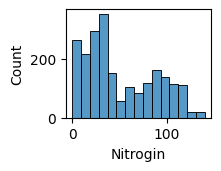

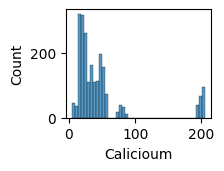

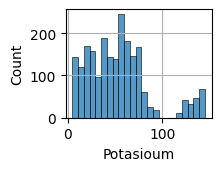

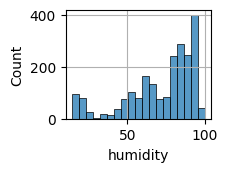

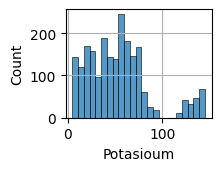

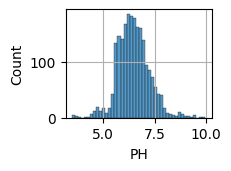

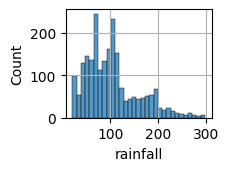

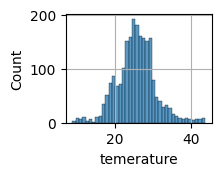

In [47]:
#Checking distributiion for each crop

plt.subplot(3,3,1)

sns.histplot(data['N'])

plt.xlabel('Nitrogin')

plt.show()



plt.subplot(3,3,2)

sns.histplot(data['K'])

plt.xlabel('Calicioum')

plt.show()



plt.subplot(3,3,3)

sns.histplot(data['P'])

plt.xlabel('Potasioum')

plt.grid()

plt.show()



plt.subplot(3,3,4)

sns.histplot(data['humidity'])

plt.xlabel('humidity')

plt.grid()

plt.show()



plt.subplot(3,3,5)

sns.histplot(data['P'])

plt.xlabel('Potasioum')

plt.grid()

plt.show()



plt.subplot(3,3,6)

sns.histplot(data['ph'])

plt.xlabel('PH')

plt.grid()

plt.show()



plt.subplot(3,3,7)

sns.histplot(data['rainfall'])

plt.xlabel('rainfall')

plt.grid()

plt.show()



plt.subplot(3,3,8)

sns.histplot(data['temperature'])

plt.xlabel('temerature')

plt.grid()

plt.show()

<ipython-input-48-a74981e6d034>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['N'], color='#002b80')
<ipython-input-48-a74981e6d034>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['P'], color='#333300')
<ipython-input-48-a74981e6d034>:29: UserWarning: 

`distplot` is a deprecated

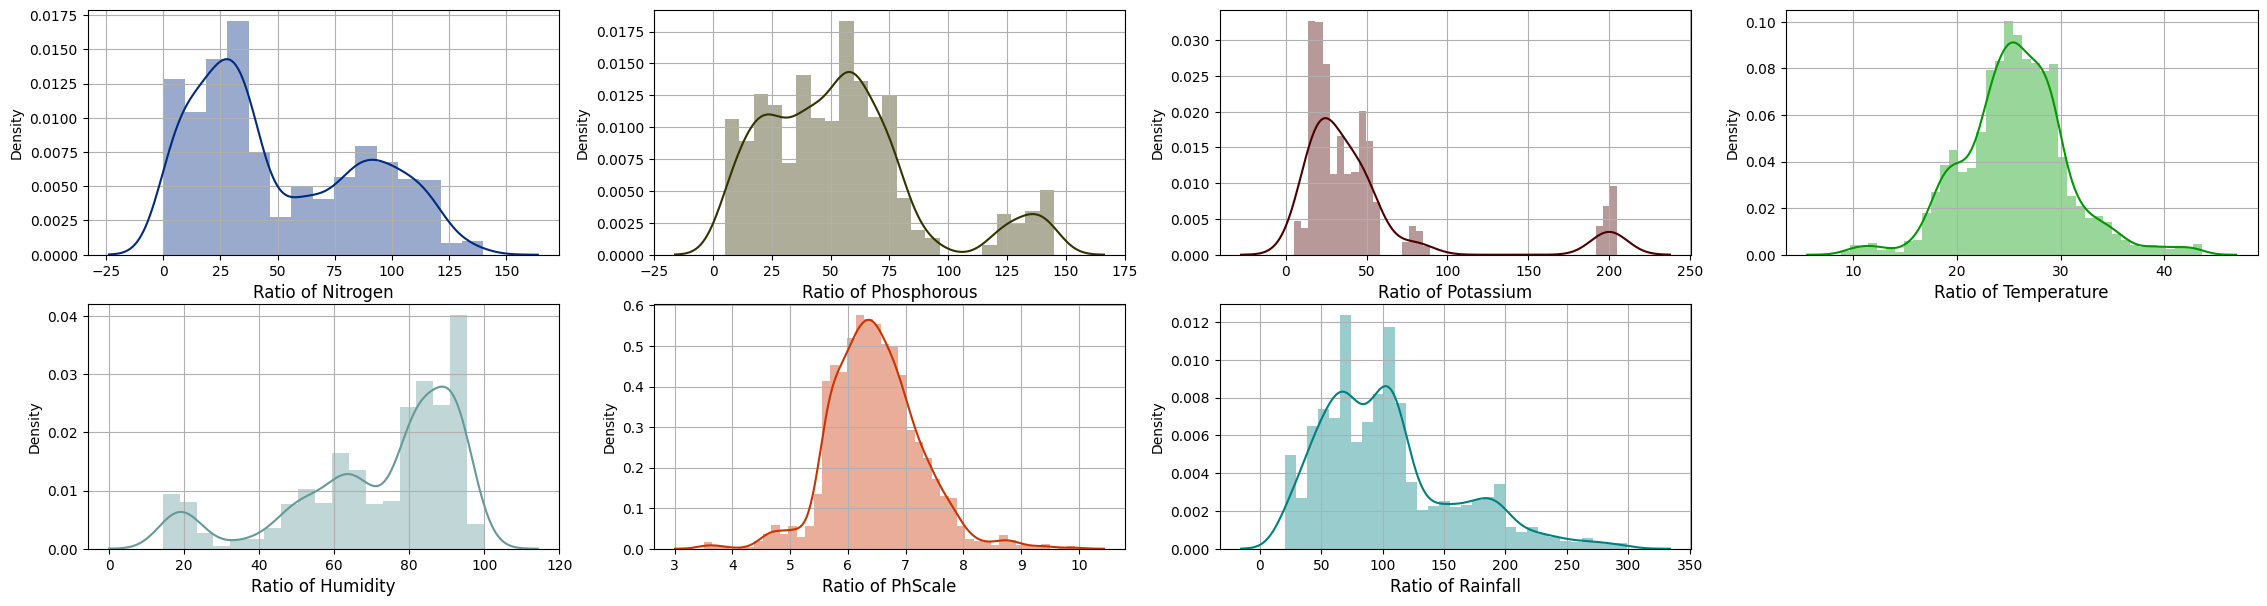

In [48]:
plt.figure(figsize=(28,7))

plt.subplot(2,4,1)

sns.distplot(data['N'], color='#002b80')

plt.xlabel('Ratio of Nitrogen',fontsize=12)

plt.grid()







plt.subplot(2,4,2)

sns.distplot(data['P'], color='#333300')

plt.xlabel('Ratio of Phosphorous',fontsize=12)

plt.grid()



plt.subplot(2,4,3)

sns.distplot(data['K'],color='#4d0000')

plt.xlabel('Ratio of Potassium', fontsize=12)

plt.grid()



plt.subplot(2,4,4)

sns.distplot(data['temperature'],color='#009900')

plt.xlabel('Ratio of Temperature' , fontsize=12)

plt.grid()



plt.subplot(2,4,5)

sns.distplot(data['humidity'] , color='#669999')

plt.xlabel('Ratio of Humidity', fontsize=12)

plt.grid()



plt.subplot(2,4,6)

sns.distplot(data['ph'], color='#cc3300')

plt.xlabel('Ratio of PhScale', fontsize=12)

plt.grid()





plt.subplot(2,4,7)

sns.distplot(data['rainfall'], color='#008080')

plt.xlabel('Ratio of Rainfall', fontsize=12)

plt.grid()

In [49]:
#Checking that crops those have unusual requirementsprint('Nitrogin Greater 140', data[data['N'] > 140 ]['label'].unique() ,'\n')


print('Phosphorous Greater 100', data[data['P'] > 100 ]['label'].unique() ,'\n')
print('..................................................................................')


print('Potacioum Greater 200', data[data['K'] > 200 ]['label'].unique() ,'\n')

print('..................................................................................')

print('Nitrogin Greater 120', data[data['N'] > 120 ]['label'].unique() ,'\n')

print('..................................................................................')

print('PH Greater 9', data[data['ph'] > 9 ]['label'].unique() ,'\n')

print('PH lesser 4', data[data['ph'] < 4 ]['label'].unique() , '\n')

print('..................................................................................')

print('Temp. Greater 40', data[data['temperature'] > 40 ]['label'].unique() ,'\n')

print('Temp. lesser 10', data[data['temperature'] < 10 ]['label'].unique() , '\n')

print('..................................................................................')

print('humidity Greater 100', data[data['humidity'] > 100 ]['label'].unique() ,'\n')

print('humidity lesser 20', data[data['humidity'] < 20 ]['label'].unique() , '\n')

Phosphorous Greater 100 ['grapes' 'apple'] 

..................................................................................
Potacioum Greater 200 ['grapes' 'apple'] 

..................................................................................
Nitrogin Greater 120 ['cotton'] 

..................................................................................
PH Greater 9 ['mothbeans'] 

PH lesser 4 ['mothbeans'] 

..................................................................................
Temp. Greater 40 ['grapes' 'papaya'] 

Temp. lesser 10 ['grapes'] 

..................................................................................
humidity Greater 100 [] 

humidity lesser 20 ['chickpea' 'kidneybeans'] 



In [50]:
#Checking which crop to be grown according to the season
print('Summer Crops:')

print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique() , '\n')

print('.....................................................................................')

print('Winter Crops:')

print(data[(data['temperature'] < 20) & (data['humidity'] < 20)]['label'].unique() , '\n')

print('...................................................................................................')

print('Winter with rainfall Crops:')

print(data[(data['temperature'] < 20) & (data['humidity'] < 20) & (data['rainfall'] > 100)]['label'].unique() , '\n')


Summer Crops:
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya'] 

.....................................................................................
Winter Crops:
['chickpea' 'kidneybeans'] 

...................................................................................................
Winter with rainfall Crops:
['kidneybeans'] 



In [51]:
x = data.drop(columns='label' , axis=1)

x = x.values

x

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

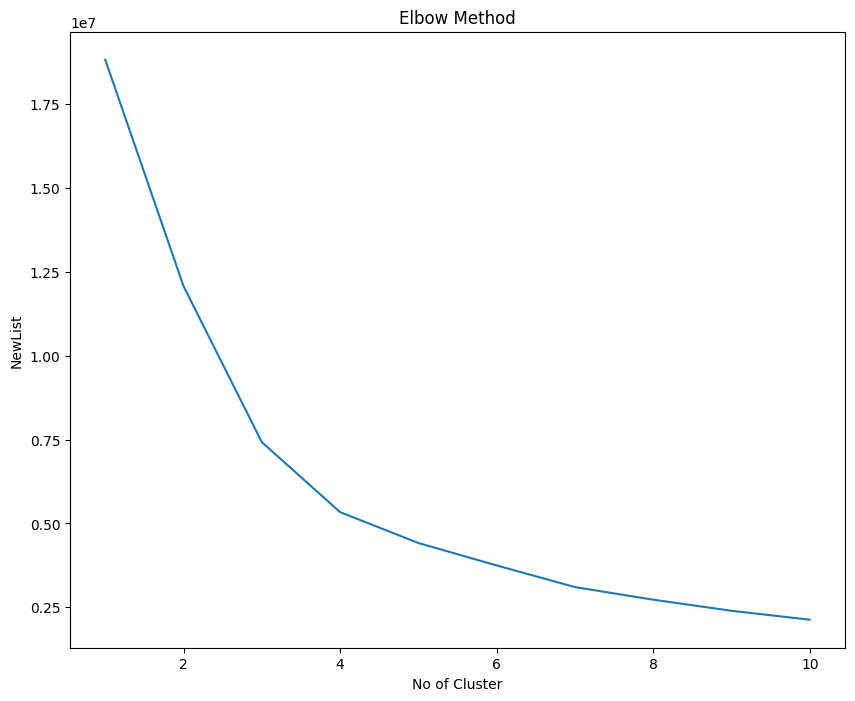

In [52]:
#Determining the optimum number of clusters within the Dataset
from sklearn.cluster import KMeans
plt.figure(figsize=(10,8))
newlist=[]
for i in range (1,11):
  km = KMeans(n_clusters=i ,init='k-means++', n_init=10, max_iter=2000, random_state=12 )
  km.fit(x)
  newlist.append(km.inertia_)
plt.plot(range (1, 11) , newlist)
plt.title('Elbow Method')
plt.xlabel ('No of Cluster')
plt.ylabel('NewList')
plt.show()

In [53]:
#Implementation of K Means algorithm to perform Clustering analysis
km = KMeans(n_clusters=4 , init='k-means++', n_init='warn', max_iter=2000,random_state=12)

prediction = km.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
concat_data = pd.concat([pd.DataFrame(prediction),data['label']],axis = 1)
concat_data

,0,label
0,0,rice
1,0,rice
2,0,rice
3,0,rice
4,0,rice
...,...,...
2195,0,coffee
2196,1,coffee
2197,0,coffee
2198,1,coffee


In [55]:
rename_data = concat_data.rename(columns = {0:'cluster'})
rename_data

,cluster,label
0,0,rice
1,0,rice
2,0,rice
3,0,rice
4,0,rice
...,...,...
2195,0,coffee
2196,1,coffee
2197,0,coffee
2198,1,coffee


In [56]:
print(f"crops in first cluster {rename_data[rename_data['cluster'] == 0]['label'].unique()}")
print(f"crops in second cluster {rename_data[rename_data['cluster'] == 1]['label'].unique()}")
print(f"crops in third cluster {rename_data[rename_data['cluster'] == 2]['label'].unique()}")
print(f"crops in fourth cluster {rename_data[rename_data['cluster'] == 3]['label'].unique()}")

crops in first cluster ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
crops in second cluster ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
crops in third cluster ['grapes' 'apple']
crops in fourth cluster ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']


In [57]:
#Splitting the Dataset for predictive modelling
from sklearn.model_selection import train_test_split
x = data.drop(columns = ['label'],axis = 1)
y = data['label']

#Creating training and testing sets for results validation
xtrain , xtest , ytrain , ytest = train_test_split(x,y, test_size = 0.3 , random_state=123)

In [58]:
print(f'x train {xtrain.shape}')
print(f'x test {xtest.shape}')
print(f'y train {ytrain.shape}')
print(f'y test {ytest.shape}')

x train (1540, 7)
x test (660, 7)
y train (1540,)
y test (660,)


In [63]:
#Creating a Predictive Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit (xtrain , ytrain)
y_pred = model.predict(xtest)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['lentil', 'pigeonpeas', 'kidneybeans', 'papaya', 'lentil',
       'grapes', 'orange', 'coconut', 'cotton', 'grapes', 'cotton',
       'kidneybeans', 'pigeonpeas', 'pomegranate', 'apple', 'rice',
       'kidneybeans', 'pigeonpeas', 'pigeonpeas', 'orange', 'watermelon',
       'apple', 'pomegranate', 'apple', 'maize', 'mungbean', 'mungbean',
       'grapes', 'watermelon', 'kidneybeans', 'muskmelon', 'cotton',
       'pigeonpeas', 'orange', 'apple', 'banana', 'cotton', 'banana',
       'jute', 'orange', 'orange', 'maize', 'jute', 'mango', 'apple',
       'apple', 'orange', 'orange', 'pigeonpeas', 'papaya', 'chickpea',
       'rice', 'rice', 'pomegranate', 'pomegranate', 'muskmelon', 'rice',
       'mothbeans', 'watermelon', 'pomegranate', 'chickpea', 'chickpea',
       'apple', 'kidneybeans', 'pomegranate', 'chickpea', 'lentil',
       'blackgram', 'apple', 'mungbean', 'maize', 'orange', 'cotton',
       'lentil', 'papaya', 'grapes', 'mango', 'lentil', 'cotton',
       'pigeonpeas'

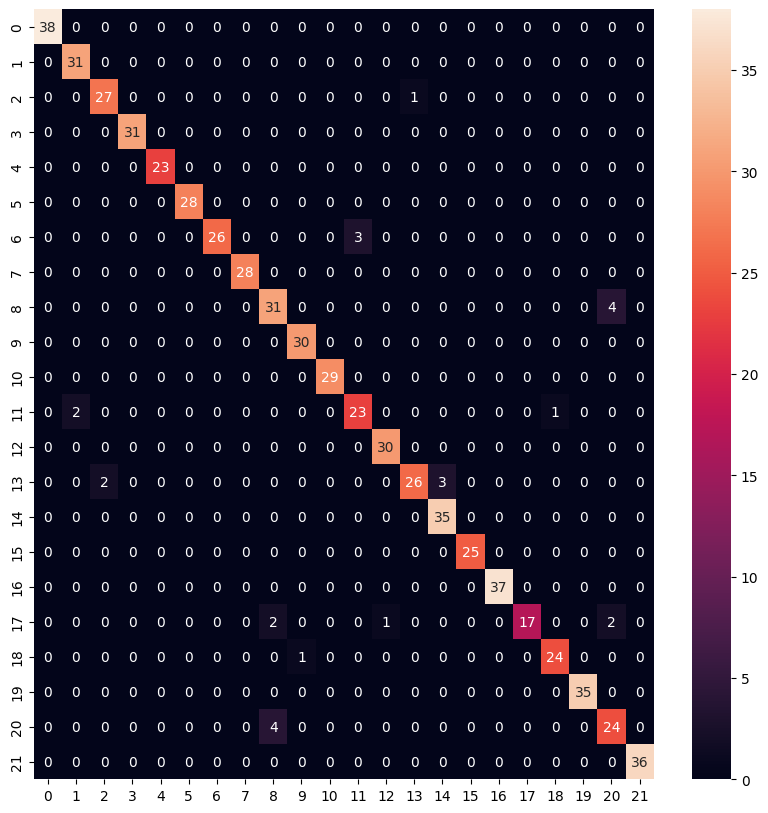

In [66]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest , y_pred)
plt.figure(figsize=(10 ,10))
sns.heatmap(cm , annot = True)
plt.show()

In [67]:
#Defining the classification Report
from sklearn.metrics import classification_report
report = classification_report(ytest , y_pred)

print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       0.94      1.00      0.97        31
   blackgram       0.93      0.96      0.95        28
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        28
      cotton       1.00      0.90      0.95        29
      grapes       1.00      1.00      1.00        28
        jute       0.84      0.89      0.86        35
 kidneybeans       0.97      1.00      0.98        30
      lentil       1.00      1.00      1.00        29
       maize       0.88      0.88      0.88        26
       mango       0.97      1.00      0.98        30
   mothbeans       0.96      0.84      0.90        31
    mungbean       0.92      1.00      0.96        35
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        37
      papaya       1.00    

In [69]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [70]:
# print("The Suggested Crop for given climatic condition is :",prediction)
prediction = model.predict([[107,34,32,26.774637,66.413269,6.780064,177.774507]])
print("The Suggested Crop for given climatic condition is :",prediction)

The Suggested Crop for given climatic condition is : ['coffee']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
